## Data Generation

### created by Yuying Liu, 04/30/2020

This script is used for generating data sets for multiscale HiTS experiments. Here, we consider 5 nonlinear systems: a hyperbolic fixed point, a damped cubic oscillator, the Van der Pol oscillator, a Hopf normal form, and the Lorenz system. Simulations are conducted using scipy.integrate.solve_ivp() and considered as ground truth.

In [1]:
import os
import numpy as np
import scipy as sp
from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
# paths
data_dir = '../../data/'
hyperbolic_dir = os.path.join(data_dir, 'Hyperbolic')
cubic_dir = os.path.join(data_dir, 'Cubic')
vdp_dir = os.path.join(data_dir, 'VanDerPol')
hopf_dir = os.path.join(data_dir, 'Hopf')
lorenz_dir = os.path.join(data_dir, 'Lorenz')

In [3]:
# adjustable parameters
dt = 0.01       # set to 5e-4 for Lorenz
noise = 0.05     # for study of noisy measurements, we use noise=0.01, 0.02; otherwise we leave it as 0.
n_forward = 5
total_steps = 1024 * n_forward
t = np.linspace(0, (total_steps)*dt, total_steps+1)

### Hyperbolic fixed point

\begin{split}
    \dot{x} &= \mu x \\
    \dot{y} &= \lambda(y-x^2)     
\end{split}

In [36]:
# system
mu = -0.05
lam = -1.0
def hyperbolic_rhs(x):
    return np.array([mu*x[0], lam*(x[1]-x[0]**2)])

# simulation parameters
np.random.seed(2)
n = 2

# dataset 
n_train = 1600
n_val = 320
n_test = 320

In [37]:
# simulate training trials 
train_data = np.zeros((n_train, total_steps+1, n))
print('generating training trials ...')
for i in tqdm(range(n_train)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: hyperbolic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    train_data[i, :, :] = sol.y.T

# simulate validation trials 
val_data = np.zeros((n_val, total_steps+1, n))
print('generating validation trials ...')
for i in tqdm(range(n_val)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: hyperbolic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    val_data[i, :, :] = sol.y.T
    
# simulate test trials
test_data = np.zeros((n_test, total_steps+1, n))
print('generating testing trials ...')
for i in tqdm(range(n_test)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: hyperbolic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    test_data[i, :, :] = sol.y.T
    
print("train_data.std(1).mean(0) = ", train_data.std(1).mean(0))
# add noise
train_data += noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
val_data += noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
test_data += noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)
        
# save data
np.save(os.path.join(hyperbolic_dir, 'train_noise{}.npy'.format(noise)), train_data)
np.save(os.path.join(hyperbolic_dir, 'val_noise{}.npy'.format(noise)), val_data)
np.save(os.path.join(hyperbolic_dir, 'test_noise{}.npy'.format(noise)), test_data)

generating training trials ...


  0%|          | 0/1600 [00:00<?, ?it/s]

generating validation trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

generating testing trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

train_data.std(1).mean(0) =  [0.12597688 0.09995497]


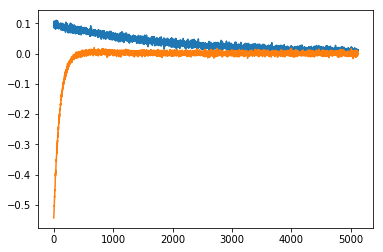

In [38]:
i = 1
plt.plot(test_data[i,:,0])
plt.plot(test_data[i,:,1])

### Cubic oscillator

\begin{split}
    \dot{x} &= -0.1x^3 + 2y^3 \\
    \dot{y} &= -2x^3 - 0.1y^3
\end{split}

In [45]:
# system


def cubic_rhs(x):
    return np.array([-0.1*x[0]**3+2*x[1]**3, 
                     -2*x[0]**3-0.1*x[1]**3])

# simulation parameters
np.random.seed(2)
n = 2

# dataset 
n_train = 3200
n_val = 320
n_test = 320

In [46]:
# simulate training trials 
train_data = np.zeros((n_train, total_steps+1, n))
print('generating training trials ...')
for i in tqdm(range(n_train)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: cubic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    train_data[i, :, :] = sol.y.T

# simulate validation trials 
val_data = np.zeros((n_val, total_steps+1, n))
print('generating validation trials ...')
for i in tqdm(range(n_val)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: cubic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    val_data[i, :, :] = sol.y.T
    
# simulate test trials
test_data = np.zeros((n_test, total_steps+1, n))
print('generating testing trials ...')
for i in tqdm(range(n_test)):
    x_init = np.random.uniform(-1.0, 1.0, n)
    sol = sp.integrate.solve_ivp(lambda _, x: cubic_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    test_data[i, :, :] = sol.y.T
    
# add noise
train_data += noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
val_data += noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
test_data += noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)    

# save data
np.save(os.path.join(cubic_dir, 'train_noise{}.npy'.format(noise)), train_data)
np.save(os.path.join(cubic_dir, 'val_noise{}.npy'.format(noise)), val_data)
np.save(os.path.join(cubic_dir, 'test_noise{}.npy'.format(noise)), test_data)

generating training trials ...


  0%|          | 0/3200 [00:00<?, ?it/s]

generating validation trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

generating testing trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

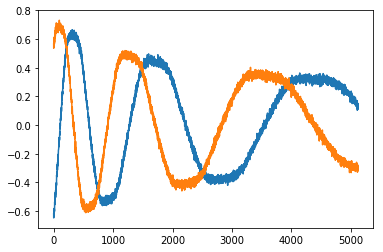

In [47]:
i = 1
plt.plot(test_data[i,:,0])
plt.plot(test_data[i,:,1])

### Van der Pol

\begin{split}
    \dot{x} &= y \\
    \dot{y} &= \mu(1-x^2)y - x   
\end{split}

where $\mu=2.0$

In [60]:
# system
noise = 0.2     # for study of noisy measurements, we use noise=0.01, 0.02; otherwise we leave it as 0.

mu = 2.0
def van_der_pol_rhs(x):
    return np.array([x[1], mu*(1-x[0]**2)*x[1]-x[0]])

# simulation parameters
np.random.seed(2)
n = 2

# dataset 
n_train = 3200
n_val = 320
n_test = 320

In [61]:
# simulate training trials 
train_data = np.zeros((n_train, total_steps+1, n))
print('generating training trials ...')
for i in tqdm(range(n_train)):
    x_init = [np.random.uniform(-2.0, 2.0), np.random.uniform(-4.0, 4.0)]
    sol = sp.integrate.solve_ivp(lambda _, x: van_der_pol_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    train_data[i, :, :] = sol.y.T

# simulate validation trials 
val_data = np.zeros((n_val, total_steps+1, n))
print('generating validation trials ...')
for i in tqdm(range(n_val)):
    x_init = [np.random.uniform(-2.0, 2.0), np.random.uniform(-2.0, 2.0)]    # make sure we have seen them in training set
    sol = sp.integrate.solve_ivp(lambda _, x: van_der_pol_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    val_data[i, :, :] = sol.y.T
    
# simulate test trials
test_data = np.zeros((n_test, total_steps+1, n))
print('generating testing trials ...')
for i in tqdm(range(n_test)):
    x_init = [np.random.uniform(-2.0, 2.0), np.random.uniform(-2.0, 2.0)]
    sol = sp.integrate.solve_ivp(lambda _, x: van_der_pol_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    test_data[i, :, :] = sol.y.T
        
# add noise
train_data += noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
val_data += noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
test_data += noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)
        
# save data
np.save(os.path.join(vdp_dir, 'train_noise{}.npy'.format(noise)), train_data)
np.save(os.path.join(vdp_dir, 'val_noise{}.npy'.format(noise)), val_data)
np.save(os.path.join(vdp_dir, 'test_noise{}.npy'.format(noise)), test_data)

generating training trials ...


  0%|          | 0/3200 [00:00<?, ?it/s]

generating validation trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

generating testing trials ...


  0%|          | 0/320 [00:00<?, ?it/s]

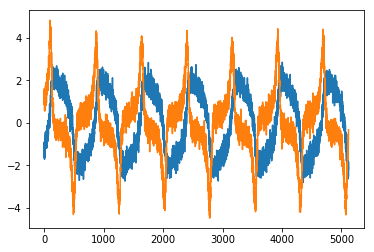

In [62]:
i = 1
plt.plot(test_data[i,:,0])
plt.plot(test_data[i,:,1])

### Hopf bifurcation

\begin{split}
    \dot{\mu} &= 0 \\
    \dot{x} &= \mu x + y -x(x^2+y^2) \\
    \dot{y} &= \mu y - x -y(x^2+y^2)
\end{split}

In [ ]:
# system
def hopf_rhs(x):
    return np.array([0, x[0]*x[1]+x[2]-x[1]*(x[1]**2+x[2]**2),
                    -x[1]+x[0]*x[2]-x[2]*(x[1]**2+x[2]**2)])

# simulation parameters
np.random.seed(2)
n = 3

# dataset 
n_train = 3200
n_val = 320
n_test = 320

In [ ]:
# simulate training trials 
train_data = np.zeros((n_train, total_steps+1, n))
print('generating training trials ...')
for i in tqdm(range(n_train)):
    x_init = [np.random.uniform(-0.2, 0.6), np.random.uniform(-1, 2), np.random.uniform(-1, 1)]
    sol = sp.integrate.solve_ivp(lambda _, x: hopf_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    train_data[i, :, :] = sol.y.T

# simulate validation trials 
val_data = np.zeros((n_val, total_steps+1, n))
print('generating validation trials ...')
for i in tqdm(range(n_val)):
    x_init = [np.random.uniform(-0.2, 0.6), np.random.uniform(-1, 2), np.random.uniform(-1, 1)]
    sol = sp.integrate.solve_ivp(lambda _, x: hopf_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    val_data[i, :, :] = sol.y.T
    
# simulate test trials
test_data = np.zeros((n_test, total_steps+1, n))
print('generating testing trials ...')
for i in tqdm(range(n_test)):
    x_init = [np.random.uniform(-0.2, 0.6), np.random.uniform(-1, 2), np.random.uniform(-1, 1)]
    sol = sp.integrate.solve_ivp(lambda _, x: hopf_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    test_data[i, :, :] = sol.y.T
    
# add noise
train_data += noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
val_data += noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
test_data += noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)
        
# save data
np.save(os.path.join(hopf_dir, 'train_noise{}.npy'.format(noise)), train_data)
np.save(os.path.join(hopf_dir, 'val_noise{}.npy'.format(noise)), val_data)
np.save(os.path.join(hopf_dir, 'test_noise{}.npy'.format(noise)), test_data)

### Lorenz

\begin{split}
    \dot{x} &= \sigma(y-x) \\
    \dot{y} &= x(\rho-z)-y \\
    \dot{z} &= xy - \beta z    
\end{split}

where $\sigma=10, \rho=28, \beta=8/3$

In [4]:
# system
sigma = 10
rho = 28
beta = 8/3
    
def lorenz_rhs(x):
    return np.array([sigma*(x[1]-x[0]), x[0]*(rho-x[2])-x[1], x[0]*x[1]-beta*x[2]])

# simulation parameters
np.random.seed(2)
warmup = 10000
n = 3

# dataset 
n_train = 6400
n_val = 640
n_test = 640

In [5]:
# simulate training trials 
pre_t = np.linspace(0, warmup*dt, warmup+1)

train_data = np.zeros((n_train, total_steps+1, n))
print('generating training trials ...')
x_init = np.random.uniform(-0.1, 0.1, n)
sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
for i in tqdm(range(n_train)):
    x_init = sol.y[:, -1].T
    sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    train_data[i, :, :] = sol.y.T

# simulate validation trials 
val_data = np.zeros((n_val, total_steps+1, n))
print('generating validation trials ...')
x_init = np.random.uniform(-0.1, 0.1, n)
sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
for i in tqdm(range(n_val)):
    x_init = sol.y[:, -1].T    
    sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    val_data[i, :, :] = sol.y.T
    
# simulate test trials
test_data = np.zeros((n_test, total_steps+1, n))
print('generating testing trials ...')
x_init = np.random.uniform(-0.1, 0.1, n)
sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
for i in tqdm(range(n_test)):
    x_init = sol.y[:, -1].T
    sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    test_data[i, :, :] = sol.y.T
    
# # add noise
# train_data += noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
# val_data += noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
# test_data += noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)
        
# # save data
# np.save(os.path.join(lorenz_dir, 'train_noise{}.npy'.format(noise)), train_data)
# np.save(os.path.join(lorenz_dir, 'val_noise{}.npy'.format(noise)), val_data)
# np.save(os.path.join(lorenz_dir, 'test_noise{}.npy'.format(noise)), test_data)

generating training trials ...


  0%|          | 0/6400 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



generating validation trials ...


  0%|          | 0/640 [00:00<?, ?it/s]

generating testing trials ...


  0%|          | 0/640 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



noise =  1.0


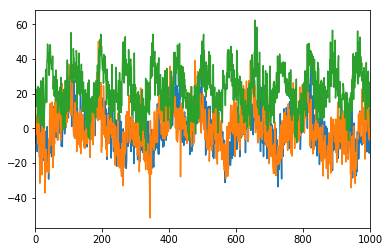

In [17]:
for noise in [1.0]:
    print("noise = ", noise)
    # add noise
    train_data_new = train_data + noise*train_data.std(1).mean(0)*np.random.randn(*train_data.shape)
    val_data_new = val_data + noise*val_data.std(1).mean(0)*np.random.randn(*val_data.shape)
    test_data_new = test_data + noise*test_data.std(1).mean(0)*np.random.randn(*test_data.shape)

    # save data
    np.save(os.path.join(lorenz_dir, 'train_noise{}.npy'.format(noise)), train_data_new)
    np.save(os.path.join(lorenz_dir, 'val_noise{}.npy'.format(noise)), val_data_new)
    np.save(os.path.join(lorenz_dir, 'test_noise{}.npy'.format(noise)), test_data_new)
    
    plt.plot(train_data_new[0,:,0])
    plt.plot(train_data_new[0,:,1])
    plt.plot(train_data_new[0,:,2])
    # print(train_data_new.shape)
    plt.xlim([0,1000])
    plt.show()

(0, 1000)

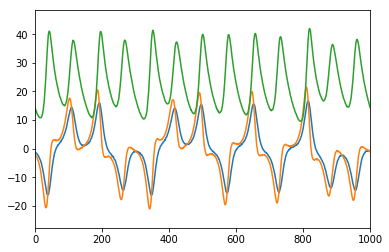

In [13]:
plt.plot(train_data_new[0,:,0])
plt.plot(train_data_new[0,:,1])
plt.plot(train_data_new[0,:,2])
# print(train_data_new.shape)
plt.xlim([0,1000])